# Imports

In [622]:
# imports for the exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [623]:
# importing the dataset

df = pd.read_csv('/home/caria/MEDM/Project 1/in-vehicle-coupon-recommendation.csv')

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Contributing to the project


In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [625]:
# load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [626]:
# Show index of duplicates
df_duplicate_analisys = df[df.duplicated(keep=False)]

def remove_dup(df: pd.DataFrame):
    # Now remove duplicates
    df = df.drop_duplicates()
    return df


In [627]:
# Value mapping

def value_mapping(df: pd.DataFrame):
    frequency_map = {'never': 0,'less1': 1,'1~3': 2,'4~8': 3,'gt8': 4}
    age_map = {'below21': 0,'21': 1,'26': 2,'31': 3,'36': 4,'41': 5,'46': 6,'50plus': 7}
    income_map = {'Less than $12500': 0,'$12500 - $24999': 1,'$25000 - $37499': 2,'$37500 - $49999': 3,
    '$50000 - $62499': 4,'$62500 - $74999': 5,'$75000 - $87499': 6,'$87500 - $99999': 7,'$100000 or More': 8}
    temperature_map = {30: 0,55: 1,80: 2}

    # CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, Bar
    df['CoffeeHouse'] = df['CoffeeHouse'].map(frequency_map)
    df['CarryAway'] = df['CarryAway'].map(frequency_map)
    df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(frequency_map)
    df['Restaurant20To50'] = df['Restaurant20To50'].map(frequency_map)
    df['Bar'] = df['Bar'].map(frequency_map)

    #age
    df['age'] = df['age'].map(age_map)

    #income 
    df['income'] = df['income'].map(income_map)

    #temperature
    df['temperature'] = df['temperature'].map(temperature_map)

    return df


In [628]:
# Drop columns

def drop_columns(df: pd.DataFrame):
    df = df.drop(columns=['car'])
    #df = df.drop(columns=['toCoupon_GEQ5min'])
    df = df.drop(columns=['direction_opp'])
    return df

In [629]:
# combine toCoupon_GEQ5min’, toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ into one column 0, 1, 2 values

#0: driving distance is less than or equal to 15 min
#1: driving distance is greater than 15 min and less than or equal to 25 min
#2: driving distance is greater than 25 min

def combine_distance_columns(df):
    """
    Combine 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', and 'toCoupon_GEQ25min' 
    columns into a single column 'to_coupon'.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe
    
    Returns:
    - df (pd.DataFrame): The modified dataframe with the 'to_coupon' column
    """
    
    def assign_to_coupon(row):
        if row['toCoupon_GEQ25min'] == 1:
            return 2
        elif row['toCoupon_GEQ15min'] == 1:
            return 1
        else:
            return 0

    # add the new column at penultimate position (before 'Y')
    df.insert(len(df.columns) - 1, 'to_coupon', np.nan)
    df['to_coupon'] = df.apply(assign_to_coupon, axis=1)

    # Drop the original columns
    df.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)
    
    return df


In [630]:
df_test1 = df.copy()

df_test1 = remove_dup(df_test1)
df_test1 = value_mapping(df_test1)
df_test1 = drop_columns(df_test1)
df_test1 = combine_distance_columns(df_test1)

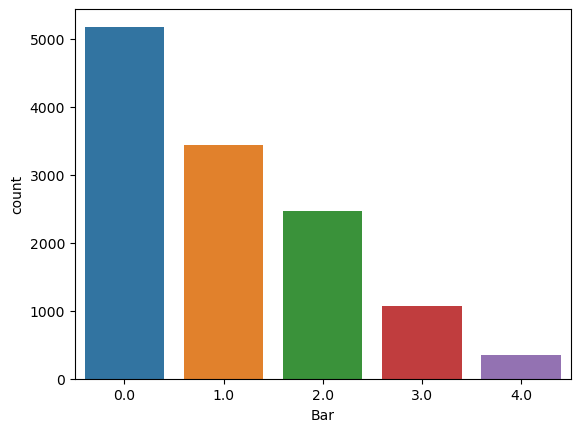

0.0    5178
1.0    3438
2.0    2468
3.0    1071
4.0     348
Name: Bar, dtype: int64
[ 0.  1.  2.  4. nan  3.]
107


In [631]:
# "Bar" variable distribution
sns.countplot(x='Bar', data=df_test1)
plt.show()

# "Bar" variable value counts
print(df_test1['Bar'].value_counts())

# "Bar" variable unique values
print(df_test1['Bar'].unique())

# does the "Bar" variable have missing values?
print(df_test1['Bar'].isnull().sum())

# Try

## Feature Engineering

In [632]:
# checking the new dataset variables
print(df_test1.columns)
print('\n')
print('New dataset has', len(df_test1.columns), 'variables. \nOriginal dataset has', len(df.columns), 'variables.')

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'to_coupon', 'Y'],
      dtype='object')


New dataset has 22 variables. 
Original dataset has 26 variables.


### Age Taxonomy

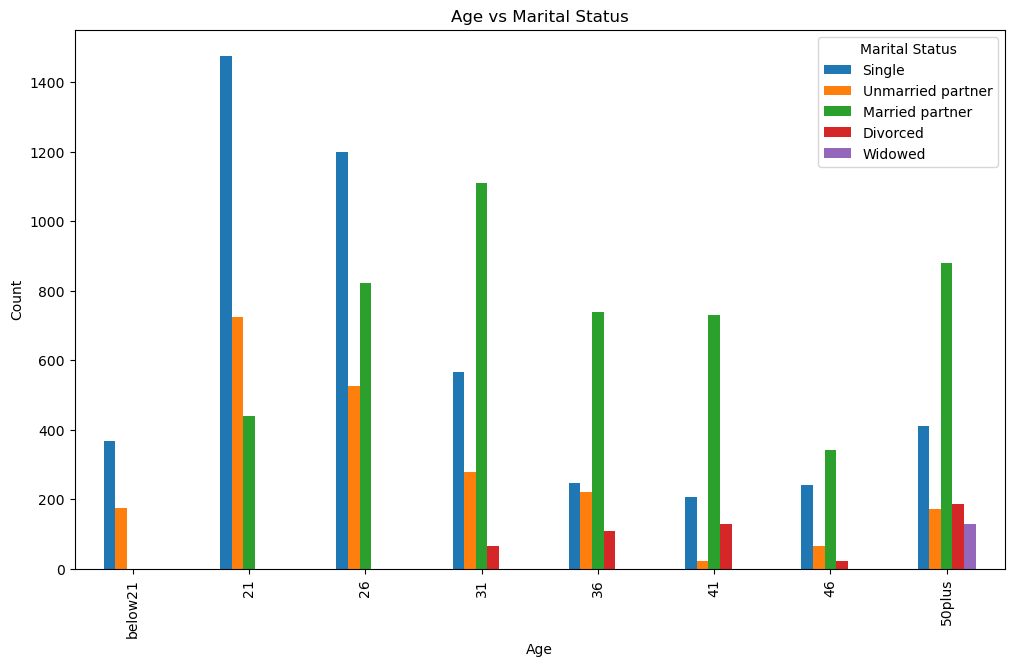

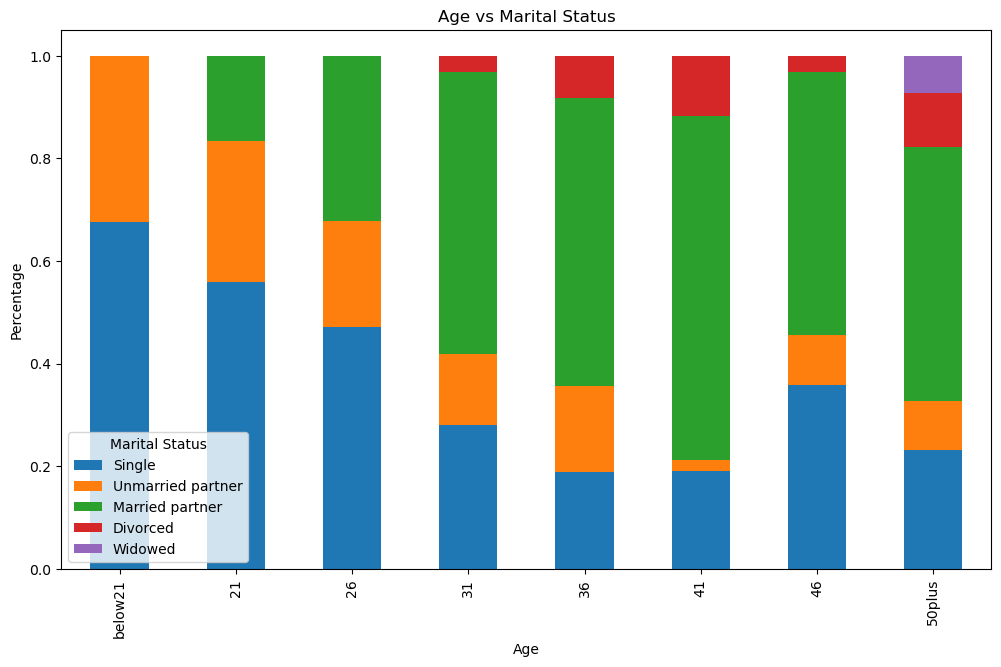

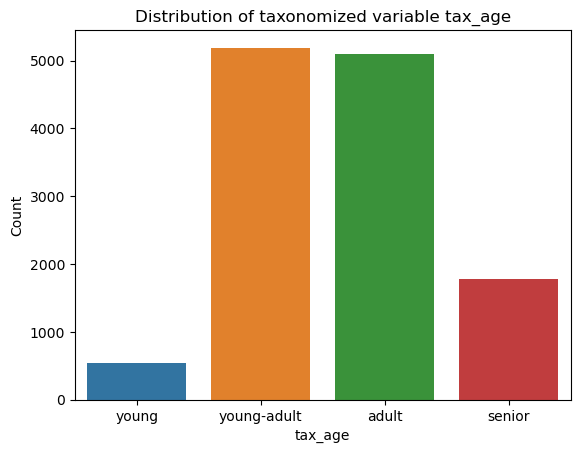

In [633]:
# analyzing age with the help of marital status

# defining 'age' categories order for visualization
custom_order_Age = [0, 1, 2, 3, 4, 5, 6, 7]

# defining 'maritalStatus' categories order for visualization
custom_order_MS = ['Single','Unmarried partner','Married partner','Divorced','Widowed']

# defining the x-axis legend
x_axis = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# pivoting the data to get counts of each combination
pivot_df = df_test1.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)

# ordering the data based on the custom orders
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]

# plotting grouped bar plot
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(custom_order_Age, x_axis)
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()


####################

# redoing this, but to analyze the percentage of each marital status per age group instead of raw counts
pivot_df = df_test1.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]
pivot_df = pivot_df.apply(lambda x: x/x.sum(), axis=1)
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(custom_order_Age, x_axis)
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()

# now, we create the new taxonomized variable 'tax_age'
# along the rules:
# 0: below 21         (0)                (young)
# 1: 21, 26           (1,2)              (young-adult)
# 2: 31, 36, 41, 46   (3,4,5,6)          (adult)
# 3: 50plus           (7)                (senior)

df_test1['tax_age'] = df_test1['age'].apply(lambda x: 0 if x == 0 else (1 if x in [1, 2] else (2 if x in [3, 4, 5, 6] else 3)))

# visualizing its distribution
sns.countplot(x='tax_age', data=df_test1)
plt.xlabel('tax_age')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['young', 'young-adult', 'adult', 'senior'])
plt.title('Distribution of taxonomized variable tax_age')
plt.show()

### Coupon total frequency

In [634]:
# {'never': 0,'less1': 1,'1~3': 2,'4~8': 3,'gt8': 4}


# summing all this up
def create_coupon_freq_total(number_used_for_gt8, df):
    # first, we need to encode the 5 coupon variables: 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar'
    # using the mean of each interval as the value to be encoded (what about for gt8?)

    coupon_names = ['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar']
    for coupon_name in coupon_names:
        df['mean_' + coupon_name] = df[coupon_name].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if x == 2 else (6 if x == 3 else number_used_for_gt8))))

    # creating a new variable called coupon_freq_total which is the sum of all the coupon frequency variables
    coupon_freq_total = df['mean_CoffeeHouse'] + df['mean_CarryAway'] + df['mean_RestaurantLessThan20'] + df['mean_Restaurant20To50'] + df['mean_Bar']
    return coupon_freq_total


# creating a new variable called coupon_freq_total which is the sum of all the coupon frequency variables
number_used_for_gt8 = 50
df_test1['coupon_freq_total'] = create_coupon_freq_total(number_used_for_gt8, df_test1)


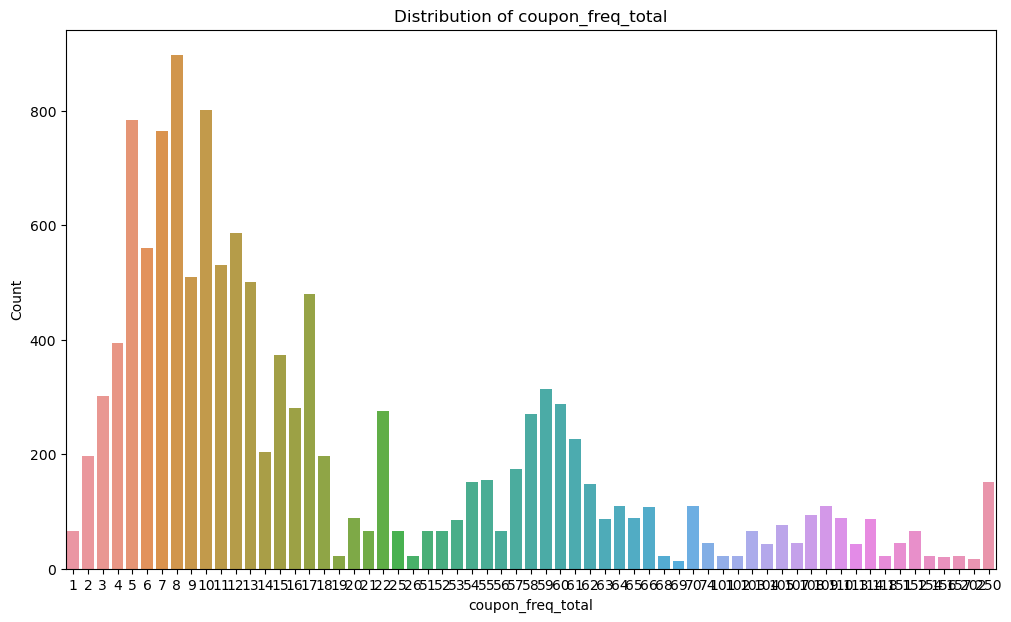

In [635]:
# checking the new variable coupon_freq_total

# value counts
#print(df_test1['coupon_freq_total'].value_counts())
# bar plot for bar distribution
plt.figure(figsize=(12, 7))
sns.countplot(x='coupon_freq_total', data=df_test1)
plt.xlabel('coupon_freq_total')
plt.ylabel('Count')
plt.title('Distribution of coupon_freq_total')
plt.show()

In [636]:
# does coupon_freq_total have 0s?
print('coupon_freq_total has', len(df_test1[df_test1['coupon_freq_total'] == 0]), '"0s".')

coupon_freq_total has 0 "0s".


Now, we will use this new variable to create the one we actually want: the importance of the given coupon for the given user. We will call this variable `coupon_importance`. 

Comes from dividing the coupon frequency by the total frequency of the user. E.g. if coupon = 'Bar', then coupon_importance = Bar_frequency / coupon_total_frequency.

In [637]:
# Vectorized computation of coupon_importance
def compute_importance(row):

    # Mapping coupon to respective frequency columns
    coupon_to_freq_mapping = {
        'Coffee House': 'mean_CoffeeHouse',
        'Carry out & Take away': 'mean_CarryAway',
        'Restaurant(<20)': 'mean_RestaurantLessThan20',
        'Restaurant(20-50)': 'mean_Restaurant20To50',
        'Bar': 'mean_Bar'
    }

    given_coupon = coupon_to_freq_mapping[row['coupon']]
    total_freq = row['coupon_freq_total']
    return row[given_coupon] / total_freq if total_freq else 0

df_test1['coupon_importance'] = df_test1.apply(compute_importance, axis=1)

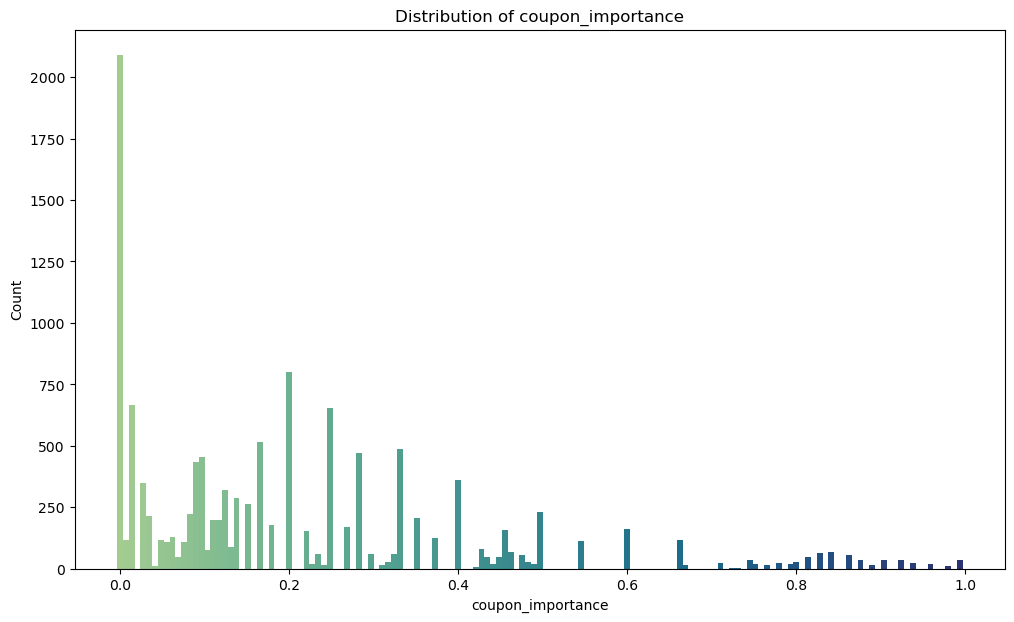

In [638]:
# visualizing new variable coupon_importance distribution

# determining unique values and the number of bins
bins = df_test1['coupon_importance'].nunique()
values, edges = np.histogram(df_test1['coupon_importance'], bins=bins)

colors = sns.color_palette("crest", bins)
plt.figure(figsize=(12, 7))
for i in range(bins):
    plt.bar(edges[i], values[i], width=edges[i+1]-edges[i], color=colors[i])
plt.xlabel('coupon_importance')
plt.ylabel('Count')
plt.title('Distribution of coupon_importance')
plt.show()

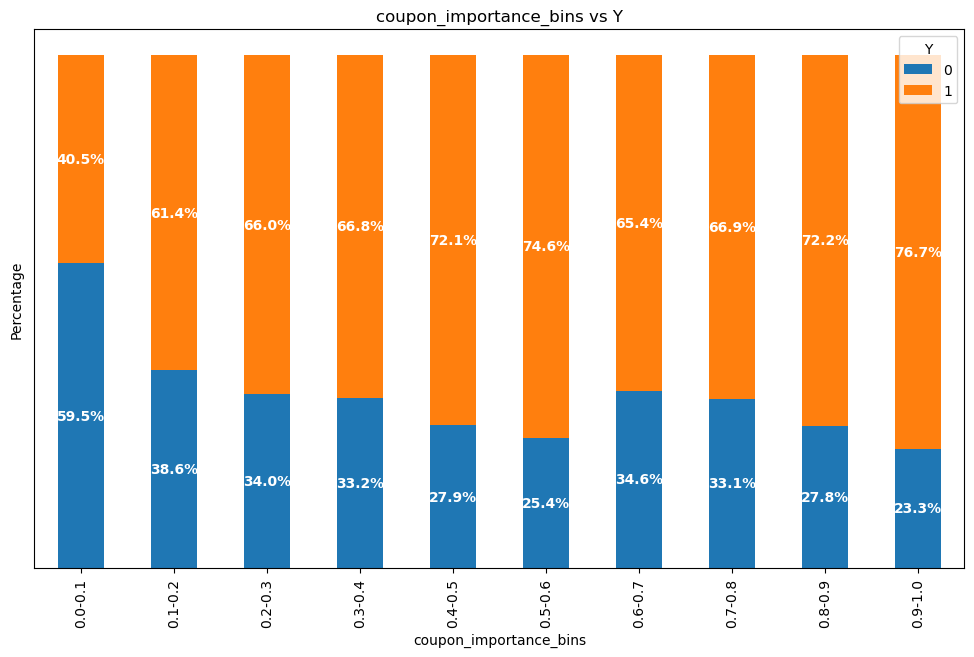

In [639]:
# creating a function to plot the percentage of each category of a feature vs the target variable
def feature_vs_target(df, feature, target, returnQ = False, plotQ = True):
    """
    Plots a bar plot of the percentage of each category of the feature vs the target variable.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe
    - feature (str): The feature column name
    - target (str): The target column name
    
    Returns:
    - None
    """
    
    # Calculating counts for each category
    grouped = df.groupby([feature, target]).size().unstack(fill_value=0)

    # Calculating percentages
    grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0) * 100



    
    
    if returnQ == True:
        return grouped_percentage
    
    if plotQ == True:
        # Plotting
        ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12,7))
        plt.title(feature + ' vs ' + target)
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.yticks([])  # Hide yticks

        # Display percentages on the bars
        for index, rect in enumerate(ax.patches):
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Choose the y-value based on the height of the bar segment
            vertical_position = rect.get_y() + y_value / 2

            label = "{:.1f}%".format(y_value)
            ax.annotate(label, (x_value, vertical_position), xytext=(0, 0),
                        textcoords="offset points", ha='center', va='center', color='white', weight='bold')        
        plt.show()


# binning coupon_importance
n_bins = 10
bins = np.arange(0, 1+1/n_bins, 1/n_bins)
labels = [str(round(float(bins[i]), 3)) + '-' + str(round(float(bins[i+1]), 3)) for i in range(n_bins)]



df_test1['coupon_importance_bins'] = pd.cut(df_test1['coupon_importance'], bins=bins, labels=labels, right=False)

# plotting coupon_importance_bins vs Y
feature_vs_target(df_test1, 'coupon_importance_bins', 'Y')

Searching for a nice enough value for number_used_for_gt8, by looking to order P(Y=1 | coupon_importance).

In [640]:
'''
number_used_for_gt8 = 9
values_that_work = []
while number_used_for_gt8 in range(9,100):

    df_test1['coupon_freq_total'] = create_coupon_freq_total(number_used_for_gt8, df_test1)
    df_test1['coupon_importance'] = df_test1.apply(compute_importance, axis=1)
    # binning coupon_importance
    n_bins = 5
    bins = np.arange(0, 1+1/n_bins, 1/n_bins)
    labels = [str(round(float(bins[i]), 3)) + '-' + str(round(float(bins[i+1]), 3)) for i in range(n_bins)]
    df_test1['coupon_importance_bins'] = pd.cut(df_test1['coupon_importance'], bins=bins, labels=labels, right=False)
    # plotting coupon_importance_bins vs Y
    prob_data = feature_vs_target(df_test1, 'coupon_importance_bins', 'Y', returnQ=True, plotQ=False)

    # extracting only the Y=1 probabilities
    prob_data = prob_data[1]

    # checking if these probabilities are in ascending order
    if prob_data.is_monotonic_increasing:
        values_that_work.append(number_used_for_gt8)

    # printing at each 100th iteration
    if number_used_for_gt8 % 25 == 0:
        print('number_used_for_gt8 =', number_used_for_gt8, 'examined.')
    
    number_used_for_gt8 += 1
    

print('Values that work:', values_that_work)
'''

# With n_bins = 5
# range(9, 100)
# Values that work: [16, 17, 18]

"\nnumber_used_for_gt8 = 9\nvalues_that_work = []\nwhile number_used_for_gt8 in range(9,100):\n\n    df_test1['coupon_freq_total'] = create_coupon_freq_total(number_used_for_gt8, df_test1)\n    df_test1['coupon_importance'] = df_test1.apply(compute_importance, axis=1)\n    # binning coupon_importance\n    n_bins = 5\n    bins = np.arange(0, 1+1/n_bins, 1/n_bins)\n    labels = [str(round(float(bins[i]), 3)) + '-' + str(round(float(bins[i+1]), 3)) for i in range(n_bins)]\n    df_test1['coupon_importance_bins'] = pd.cut(df_test1['coupon_importance'], bins=bins, labels=labels, right=False)\n    # plotting coupon_importance_bins vs Y\n    prob_data = feature_vs_target(df_test1, 'coupon_importance_bins', 'Y', returnQ=True, plotQ=False)\n\n    # extracting only the Y=1 probabilities\n    prob_data = prob_data[1]\n\n    # checking if these probabilities are in ascending order\n    if prob_data.is_monotonic_increasing:\n        values_that_work.append(number_used_for_gt8)\n\n    # printing at e

Is the probability of Y=1 in ascending order? True


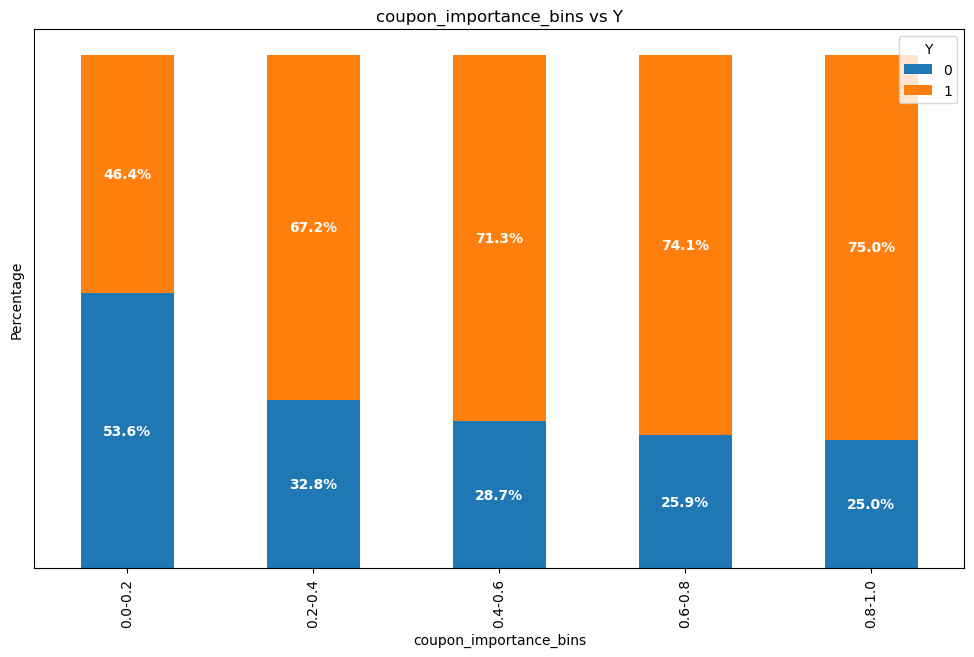

In [641]:
# testing with number_used_for_gt8 = 16 and n_bins = 5

number_used_for_gt8 = 16
df_test1['coupon_freq_total'] = create_coupon_freq_total(number_used_for_gt8, df_test1)
df_test1['coupon_importance'] = df_test1.apply(compute_importance, axis=1)
# binning coupon_importance
n_bins = 5
bins = np.arange(0, 1+1/n_bins, 1/n_bins)
labels = [str(round(float(bins[i]), 3)) + '-' + str(round(float(bins[i+1]), 3)) for i in range(n_bins)]
df_test1['coupon_importance_bins'] = pd.cut(df_test1['coupon_importance'], bins=bins, labels=labels, right=False)
# plotting coupon_importance_bins vs Y
prob_data = feature_vs_target(df_test1, 'coupon_importance_bins', 'Y', returnQ=True)

# extracting only the Y=1 probabilities
prob_data = prob_data[1]

# checking if these probabilities are in ascending order
print('Is the probability of Y=1 in ascending order?', prob_data.is_monotonic_increasing)

feature_vs_target(df_test1, 'coupon_importance_bins', 'Y')

### Time

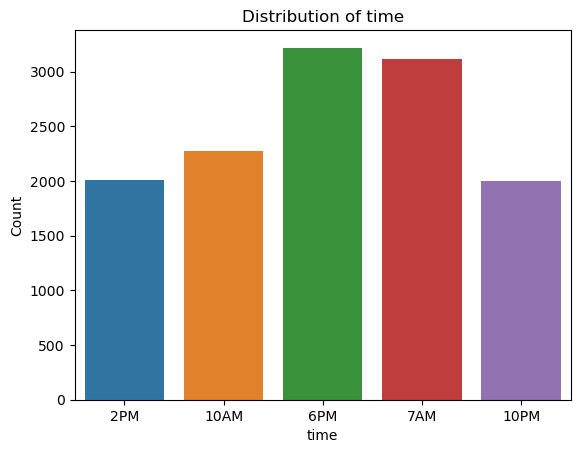

In [642]:
# sns countplot of time
sns.countplot(x='time', data=df_test1)
plt.xlabel('time')
plt.ylabel('Count')
plt.title('Distribution of time')
plt.show()

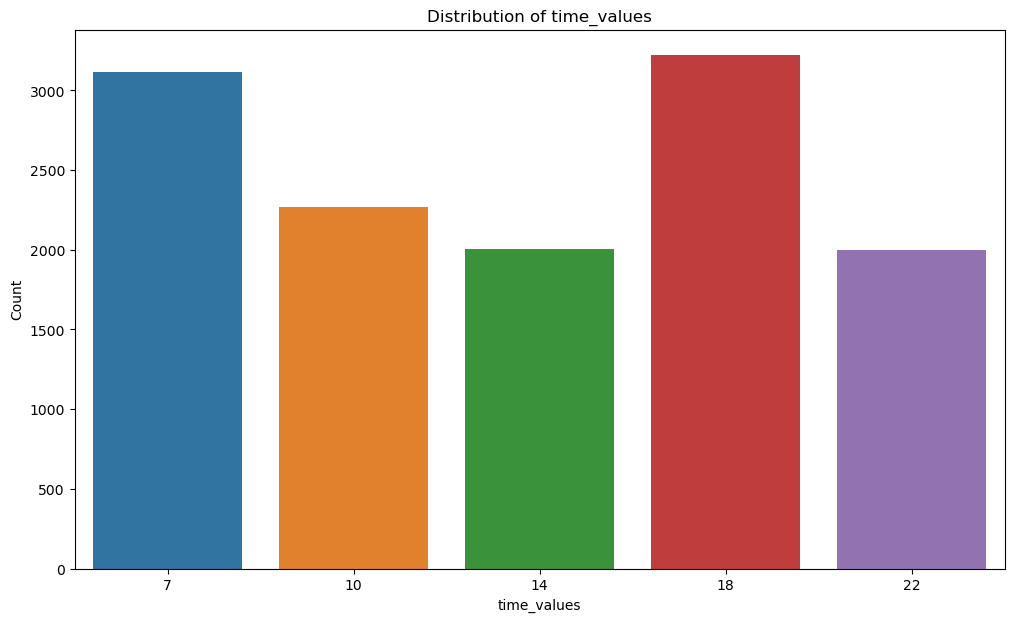

In [643]:
# time as it is, is currently categorical, although it clearly is an ordinal variable

# as such, we tried two different approaches to encode it:

# 1: direct value mapping
# i.e. 7AM -> 7, 10AM -> 10, 2PM -> 14, 6PM -> 18, 10PM -> 22
df_test1['time_values'] = df_test1['time'].apply(lambda x: 7 if x == '7AM' else (10 if x == '10AM' else (14 if x == '2PM' else (18 if x == '6PM' else 22))))

# 2: sin and cos encoding, encoding the cyclic nature of time, through a bundle of two variables
# i.e. time_sin = sin(2 * pi * time / 24)
#  and time_cos = cos(2 * pi * time / 24)
df_test1['time_sin'] = df_test1['time_values'].apply(lambda x: np.sin(2 * np.pi * x / 24))
df_test1['time_cos'] = df_test1['time_values'].apply(lambda x: np.cos(2 * np.pi * x / 24))

# checking the new variables
# time_values bar plot
plt.figure(figsize=(12, 7))
sns.countplot(x='time_values', data=df_test1)
plt.xlabel('time_values')
plt.ylabel('Count')
plt.title('Distribution of time_values')
plt.show()

In [660]:
# 2nd approach: time_sin and time_cos distribution, in the following cells

In [661]:
# let's create a function that transforms clock hours into "naive hours" i.e. as if they were "polar hours", but always from 0 to 12 
# i.e. a function unclockify such that
# unclockify(0) = 3
# unclockify(3) = 0
# unclockify(6) = 9
# unclockify(9) = 6
# unclockify(12) = 3

def unclockify(hour):
    return 3 - hour if hour <= 3 else 15 - hour

# let's visually test if this function works, through a plot
# first, let's create a list of clock hours
clock_hours = list(range(24))

# now, let's create a list of "naive hours"/"polar hours"
naive_hours = [unclockify(hour) for hour in clock_hours]

print('Clock hours:', clock_hours)
print('Naive hours:', naive_hours)

print('\n')

print('The unclockify function does work as intended!')

Clock hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Naive hours: [3, 2, 1, 0, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8]


The unclockify function does work as intended!


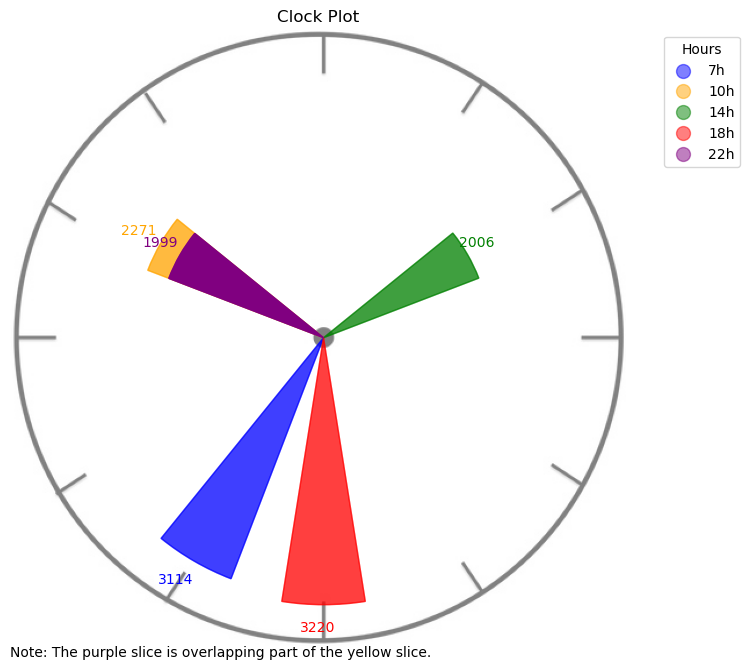

In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Assume df_test1 exists with 'time_values', 'time_sin', 'time_cos' columns.

# Extract unique hours
unique_hours = df_test1['time_values'].unique()

fig, ax = plt.subplots(figsize=(8, 8))

# number of visible hours to be represented, since it is a clock
n_hours = 12 
# Define the radius and width for the slices
radius = 1 #1.47 isn't bad

# label factor for adjusting the label position
label_factor = 1.1

color_index = 0
all_hours = range(25)
for hour in all_hours:
    # necessary hour conversion, since a polar plot is anticlockwise
    # through the usage of the clockify function
    
    center_coords = (0.027,0)

    # assigning different colors for each unique hour 
    colors_used = ['blue', 'orange', 'green', 'red', 'purple']
    if hour in unique_hours:
        plot_hour = unclockify(hour)
        # Calculate the starting and ending angles for each slice
        adjust_size_slice=45/5

        start_angle = 360 * ((plot_hour) / n_hours) - adjust_size_slice
        end_angle = start_angle +2 * adjust_size_slice

        # instead of fixed radius, the radius will be determined by the value count
        radius = df_test1['time_values'].value_counts()[hour]
        # adjusting from a to b
        a = 0
        b = 1.3
        freq = df_test1['time_values'].value_counts()[hour]
        radius = freq/max(df_test1['time_values'].value_counts())*(b-a)+a
        
        # Create a wedge (slice) for the given hour
        wedge = Wedge(center=center_coords, r=radius, theta1=start_angle, theta2=end_angle, color=colors_used[color_index], alpha=0.5) #Wedge(center=center_coords, r=radius, theta1=start_angle, theta2=end_angle, width=width, color='blue', alpha=0.5)
        ax.add_patch(wedge)
        # exception: 10AM and 10PM do coincide on the clock slice
        if hour == 22: # 10AM_freq > 10PM_freq (by examination)
            wedge = Wedge(center=center_coords, r=radius, theta1=start_angle, theta2=end_angle,color=colors_used[color_index], alpha=1)
        # adding the wedge to the plot, i.e. the slice
        ax.add_patch(wedge)

        # Label the slice
        adjust_radius_factor = 1.00
        label_angle = np.radians(start_angle + (end_angle-start_angle)/2)  # Adjusting used to be manual, but using the middle of the slice is better
        ax.annotate(f'{freq}', xy=(np.cos(label_angle)*radius*adjust_radius_factor, np.sin(label_angle)*radius*adjust_radius_factor), xytext=(label_factor*np.cos(label_angle)*radius*adjust_radius_factor, label_factor*np.sin(label_angle)*radius*adjust_radius_factor),
                    ha='center', fontsize=10, color = colors_used[color_index], alpha=1)
        

        # adding label to match colors to each hour, with plt
        plt.scatter([], [], c=colors_used[color_index], alpha=0.5, s=100, label=str(hour)+'h')
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Hours', fontsize=10)


        
        color_index += 1
    

''' meant to draw the 12 hour numbers on the clock
    if 0<hour<=12:

        radius = 1.2

        plot_hour = unclockify(hour)

        # here, we create a hollow slice
        # Calculate the starting and ending angles for each slice
        start_angle = 360 * (plot_hour / n_hours)
        end_angle = start_angle + 360 / n_hours

        # Create a wedge (slice) for the given hour
        wedge = Wedge(center=center_coords, r=radius, theta1=start_angle, theta2=end_angle, color='black', alpha=0.0)
        ax.add_patch(wedge)

        # Label the slice
        adjust_radius_factor = 1
        label_angle = np.radians(start_angle)  # Adjusting used to be manual, but using the middle of the slice is better
        ax.annotate(f'{hour}', xy=(np.cos(label_angle)*radius*adjust_radius_factor, np.sin(label_angle)*radius*adjust_radius_factor), xytext=(label_factor*np.cos(label_angle)*radius*adjust_radius_factor, label_factor*np.sin(label_angle)*radius*adjust_radius_factor),
                    ha='center', fontsize=10, color ='teal')
'''


# Adjusting the axis and title
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.axis('off')  # Turn off the axis
ax.set_title("Clock Plot")
# combining this plot with an image as background (of a clock)
clock_image = plt.imread('/home/caria/MEDM/Statistical_Methods_Data_Mining/Images/clock3.png') # clock3 works
ax.imshow(clock_image, extent=[-1.5, 1.5, -1.5, 1.5], alpha=0.5)

# adding note to bottom left saying "each slice represents frequence of given hour class"
plt.text(-1.5,-1.55,"Note: The purple slice is overlapping part of the yellow slice.")
plt.show()

### Expiration date

In [647]:
# transformning into binary variable
# 0: 2h
# 1: 1d

df_test1['expiration_binary'] = df_test1['expiration'].apply(lambda x: 0 if x == '2h' else 1)

### Education

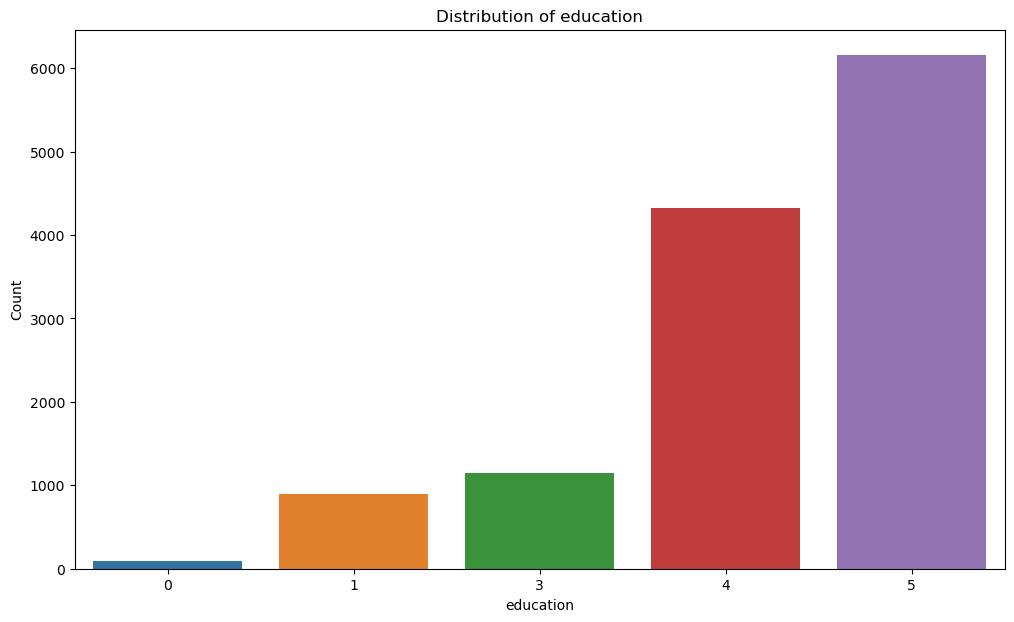

In [648]:
# defining its order
custom_order_edu = ['Some High School', 'High School Graduate', 'Some College - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree']

# let's transform the variable into an ordinal variable
# 0: Some High School
# 1: High School Graduate
# 2: Some College - no degree
# 3: Associates degree
# 4: Bachelors degree
# 5: Graduate degree

df_test1['education'] = df_test1['education'].apply(lambda x: 0 if x == 'Some High School' else (1 if x == 'High School Graduate' else (2 if x == 'Some College - no degree' else (3 if x == 'Associates degree' else (4 if x == 'Bachelors degree' else 5)))))

# let's check education distribution
plt.figure(figsize=(12, 7))
sns.countplot(x='education', data=df_test1)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Distribution of education')
plt.show()

## Temporary

In [649]:
######### this is to be removed since it will have been done previously to this later on #########
# first, which variables have missing values?
print('Variables with missing values:')
mv_variables = df_test1.columns[df_test1.isnull().any()]
print(mv_variables)
# imputing missing values with the mode
for mv_variable in mv_variables:
    df_test1[mv_variable].fillna(df_test1[mv_variable].mode()[0], inplace=True)
print('Missing values imputed.')
######### this is to be removed since it will have been done previously to this later on #########

Variables with missing values:
Index(['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50', 'coupon_importance_bins'],
      dtype='object')
Missing values imputed.


## Variable Encoding

In [650]:
# THINGS TO DO YET TO BE DONE:
# - CREATE OCCUPATION_TAXONOMY and list it
# - create EDUCATION_TAXONOMY and list it
# - analyze income, and switch it from 0,1,...,8 to something more appropriate: maybe interval means?

# handpicked list of numerical features
numerical_features = ['age','income','to_coupon','tax_age','mean_CoffeeHouse','mean_CarryAway','mean_RestaurantLessThan20','mean_Restaurant20To50','mean_Bar','coupon_freq_total','coupon_importance','time_values','time_sin','time_cos']

# handpicked list of categorical features
categorical_features = ['destination', 'passanger','weather', 'temperature', 'time','coupon','expiration','gender','maritalStatus','education','occupation','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

# handpicked list of binary features
binary_features = ['has_children','direction_same','expiration_binary']

# Grouping the different dataset lists
# variables that won't be used in the model
not_used_features = ['coupon_importance_bins','mean_CoffeeHouse','mean_CarryAway','mean_RestaurantLessThan20','mean_Restaurant20To50','mean_Bar','expiration']

# important features
print('Features that will be used in the model:')
features = numerical_features + categorical_features + binary_features
features = [feature for feature in features if feature not in not_used_features]


Features that will be used in the model:


In [651]:
# df_ready should not include some useless features we had to create along the way (let's use the list not_used_features for that)
df_ready = df_test1[[feature for feature in df_test1.columns if feature not in not_used_features]]

# One-hot encode the categorical features
categorical_important_features = [feature for feature in categorical_features if feature not in not_used_features]
df_ready = pd.get_dummies(df_ready, columns=categorical_important_features)

## Mutual Information Feature Selection

#### Defining Mutual Information between two variables.

In [652]:
def MI_num2num(X, Y):
    """Compute mutual information of two discrete random variables.
    
    Args:
    - X (array-like): A list or array of samples from the first variable.
    - Y (array-like): A list or array of samples from the second variable.
    
    Returns:
    - float: Mutual information (MI) between X and Y.
    """
    
    # Create a 2D histogram of the two input variables
    joint_prob, _, _ = np.histogram2d(X, Y, bins=(len(np.unique(X)), len(np.unique(Y))), range=((X.min(), X.max()), (Y.min(), Y.max())), density=True)
    
    # Marginal probabilities
    prob_X = np.sum(joint_prob, axis=1)
    prob_Y = np.sum(joint_prob, axis=0)
    
    # Calculate MI
    MI = 0
    for i in range(joint_prob.shape[0]):
        for j in range(joint_prob.shape[1]):
            if joint_prob[i, j] > 0:
                MI += joint_prob[i, j] * np.log(joint_prob[i, j] / (prob_X[i] * prob_Y[j]))
                
    return MI

# Example
X = np.array([0, 0, 1, 1, 2, 2])
Y = np.array([0, 1, 1, 0, 2, 2])
print(MI_num2num(X, Y))


###########################################

def MI_cat2cat(cat_var1, cat_var2):
    """Compute mutual information of two categorical variables.
    
    Args:
    - cat_var1 (array-like): A list or array of samples from the first categorical variable.
    - cat_var2 (array-like): A list or array of samples from the second categorical variable.
    
    Returns:
    - float: Mutual information (MI) between the two categorical variables.
    """
    
    # Create a contingency table
    contingency_table = pd.crosstab(cat_var1, cat_var2)
    
    # Calculate joint probabilities
    joint_prob = contingency_table.values / len(cat_var1)
    
    # Marginal probabilities
    prob_cat_var1 = np.sum(joint_prob, axis=1)
    prob_cat_var2 = np.sum(joint_prob, axis=0)
    
    # Calculate MI
    MI = 0
    for i in range(joint_prob.shape[0]):
        for j in range(joint_prob.shape[1]):
            if joint_prob[i, j] > 0:  # Avoid log(0)
                MI += joint_prob[i, j] * np.log(joint_prob[i, j] / (prob_cat_var1[i] * prob_cat_var2[j]))
    
    return MI

# Example
cat_var1 = ['A', 'A', 'B', 'B', 'C', 'C']
cat_var2 = ['W', 'X', 'X', 'W', 'Z', 'Z']
print(MI_cat2cat(cat_var1, cat_var2))


###########################################

def MI_num2cat(num_var, cat_var, bins=10):
    """Compute mutual information between a numerical and a categorical variable.
    
    Args:
    - num_var (array-like): A list or array of samples from the numerical variable.
    - cat_var (array-like): A list or array of samples from the categorical variable.
    - bins (int or sequence of scalars): Number of bins for discretizing the numerical variable, or the bin edges.
    
    Returns:
    - float: Mutual information (MI) between the numerical and categorical variables.
    """
    
    # Discretize the numerical variable
    binned_num_var = pd.cut(num_var, bins=bins, labels=range(bins))
    
    # Now, calculate mutual information as if between two categorical variables
    return MI_cat2cat(binned_num_var, cat_var)

# Example
num_var = [0.5, 1.5, 2.5, 2.8, 3.5, 4.5, 5.5, 6.2, 7.0, 8.5]
cat_var = ['A', 'B', 'B', 'A', 'C', 'C', 'B', 'A', 'C', 'B']
print(MI_num2cat(num_var, cat_var, bins=3))


-0.392436107823411
0.6365141682948128
0.2911031660323687


In [653]:
# testing on the dataset

# MI(age, age) (numerical vs numerical)

print('MI(age, age) =', MI_num2num(df_test1['age'], df_test1['age']))

# MI(age, Y) (numerical vs categorical)

print('MI(age, Y) =', MI_num2cat(df_test1['age'], df_test1['Y']))

# MI(maritalStatus, Y) (categorical vs categorical)

print('MI(maritalStatus, Y) =', MI_cat2cat(df_test1['maritalStatus'], df_test1['Y']))

# MI(coupon_freq_total, Y) (numerical vs categorical)

print('MI(coupon_freq_total, Y) =', MI_num2cat(df_test1['coupon_freq_total'], df_test1['Y']))

MI(age, age) = 2.2103412856521008
MI(age, Y) = 0.0025100343099697473
MI(maritalStatus, Y) = 0.0018893155625209174
MI(coupon_freq_total, Y) = 0.002867488041266098


#### Crude MI analysis

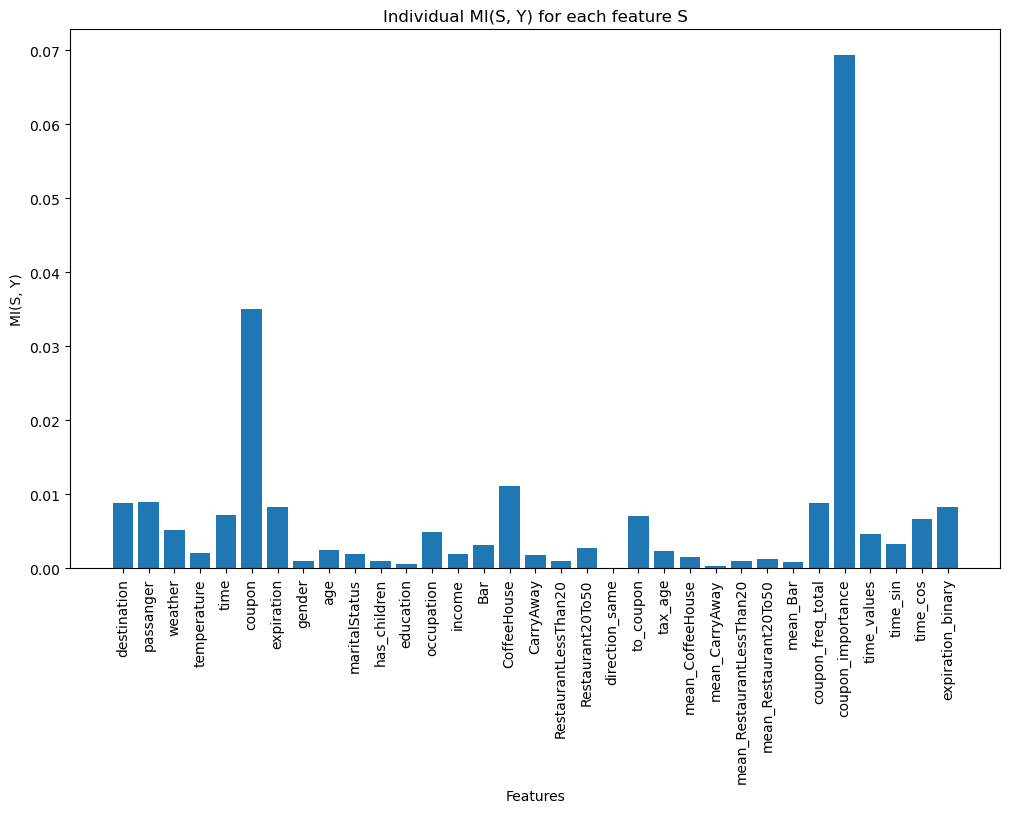

MI(age, age) = 2.2103412856521008


In [654]:
# testing MI functions on the dataset
# note: Y is binary

# let's plot MI(S, Y) for each feature S
mi_values = []
feature_names = []  # A new list to keep track of the features we calculate MI for

for feature in df_test1.columns:
    if feature != 'Y' and feature != 'coupon_importance_bins':
        # categorical features
        if feature in categorical_features:
            mi_values.append(MI_cat2cat(df_test1[feature], df_test1['Y']))
        # numerical features
        elif feature in numerical_features:
            mi_values.append(MI_num2cat(df_test1[feature], df_test1['Y'], bins=len(df_test1[feature].unique())))
        # binary features
        elif feature in binary_features:
            mi_values.append(MI_cat2cat(df_test1[feature], df_test1['Y']))
        feature_names.append(feature)  # Add the feature name to our list


# plot
plt.figure(figsize=(12, 7))
plt.bar(feature_names, mi_values)  # Use feature_names instead of df_test1.columns[1:]
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('MI(S, Y)')
plt.title('Individual MI(S, Y) for each feature S')
plt.show()

# test: MI(age, age)
print('MI(age, age) =', MI_num2num(df_test1['age'], df_test1['age']))

#### JMIM

In [655]:
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score

def compute_mi(x, y):
    """Compute mutual information MI(x;y)"""
    contingency = np.histogram2d(x, y)[0]
    
    # Apply Laplace smoothing
    contingency += 1
    
    return chi2_contingency(contingency)[1]

def compute_cmi(x, y, z):
    """Compute conditional mutual information MI(x;y|z)"""
    mi_xz = compute_mi(x, z)
    mi_yz = compute_mi(y, z)
    mi_xyz = compute_mi(x, y + z * 2)  # Combining y and z into a single 2-bit number
    
    return mi_xz + mi_yz - mi_xyz

def JMIM(data, target, n_features):
    """
    JMIM feature selection.
    data: DataFrame with numerical features.
    target: binary target variable.
    n_features: number of features to select.
    """
    S = []
    while len(S) < n_features:
        max_j_value = -np.inf
        selected_feature = None
        
        for feature in data.columns:
            if feature not in S:
                mi = compute_mi(data[feature], target)
                
                if S:
                    max_cmi = max(compute_cmi(data[feature], target, data[s]) - compute_mi(data[feature], data[s]) - compute_mi(data[s], target) for s in S)
                    j_value = mi - max_cmi
                else:
                    j_value = mi
                
                if j_value > max_j_value:
                    max_j_value = j_value
                    selected_feature = feature
        
        if selected_feature:
            S.append(selected_feature)
    
    return S

#### Feature Selection

In [656]:
# applying JMIM feature selection
selected_features = JMIM(df_ready.drop(columns=['Y']), df_ready['Y'], 10)
print("Selected features:", selected_features)

# Selected features: ['income', 'time_6PM', 'coupon_freq_total', 'coupon_importance', 'age', 'has_children', 'direction_same', 'to_coupon', 'tax_age', 'time_values']

Selected features: ['income', 'time_6PM', 'coupon_freq_total', 'coupon_importance', 'age', 'has_children', 'direction_same', 'to_coupon', 'tax_age', 'time_values']
